# **Pulsa Start**

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import roc_curve,auc
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [36]:
url_train='pulsar_data_train.csv'
url_test='pulsar_data_test.csv'

In [37]:
df_train=pd.read_csv(url_train,sep=',')
df_test=pd.read_csv(url_test,sep=',')

In [38]:
print('Data de Entrenamiento')
print(df_train.shape)
print('Total de vacios :')
print(df_train.isnull().sum().sum())
print('Data de testeo')
print(df_test.shape)
print('Total de vacios :')
print(df_test.isnull().sum().sum())

Data de Entrenamiento
(12528, 9)
Total de vacios :
3538
Data de testeo
(5370, 9)
Total de vacios :
6905


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


<Axes: >

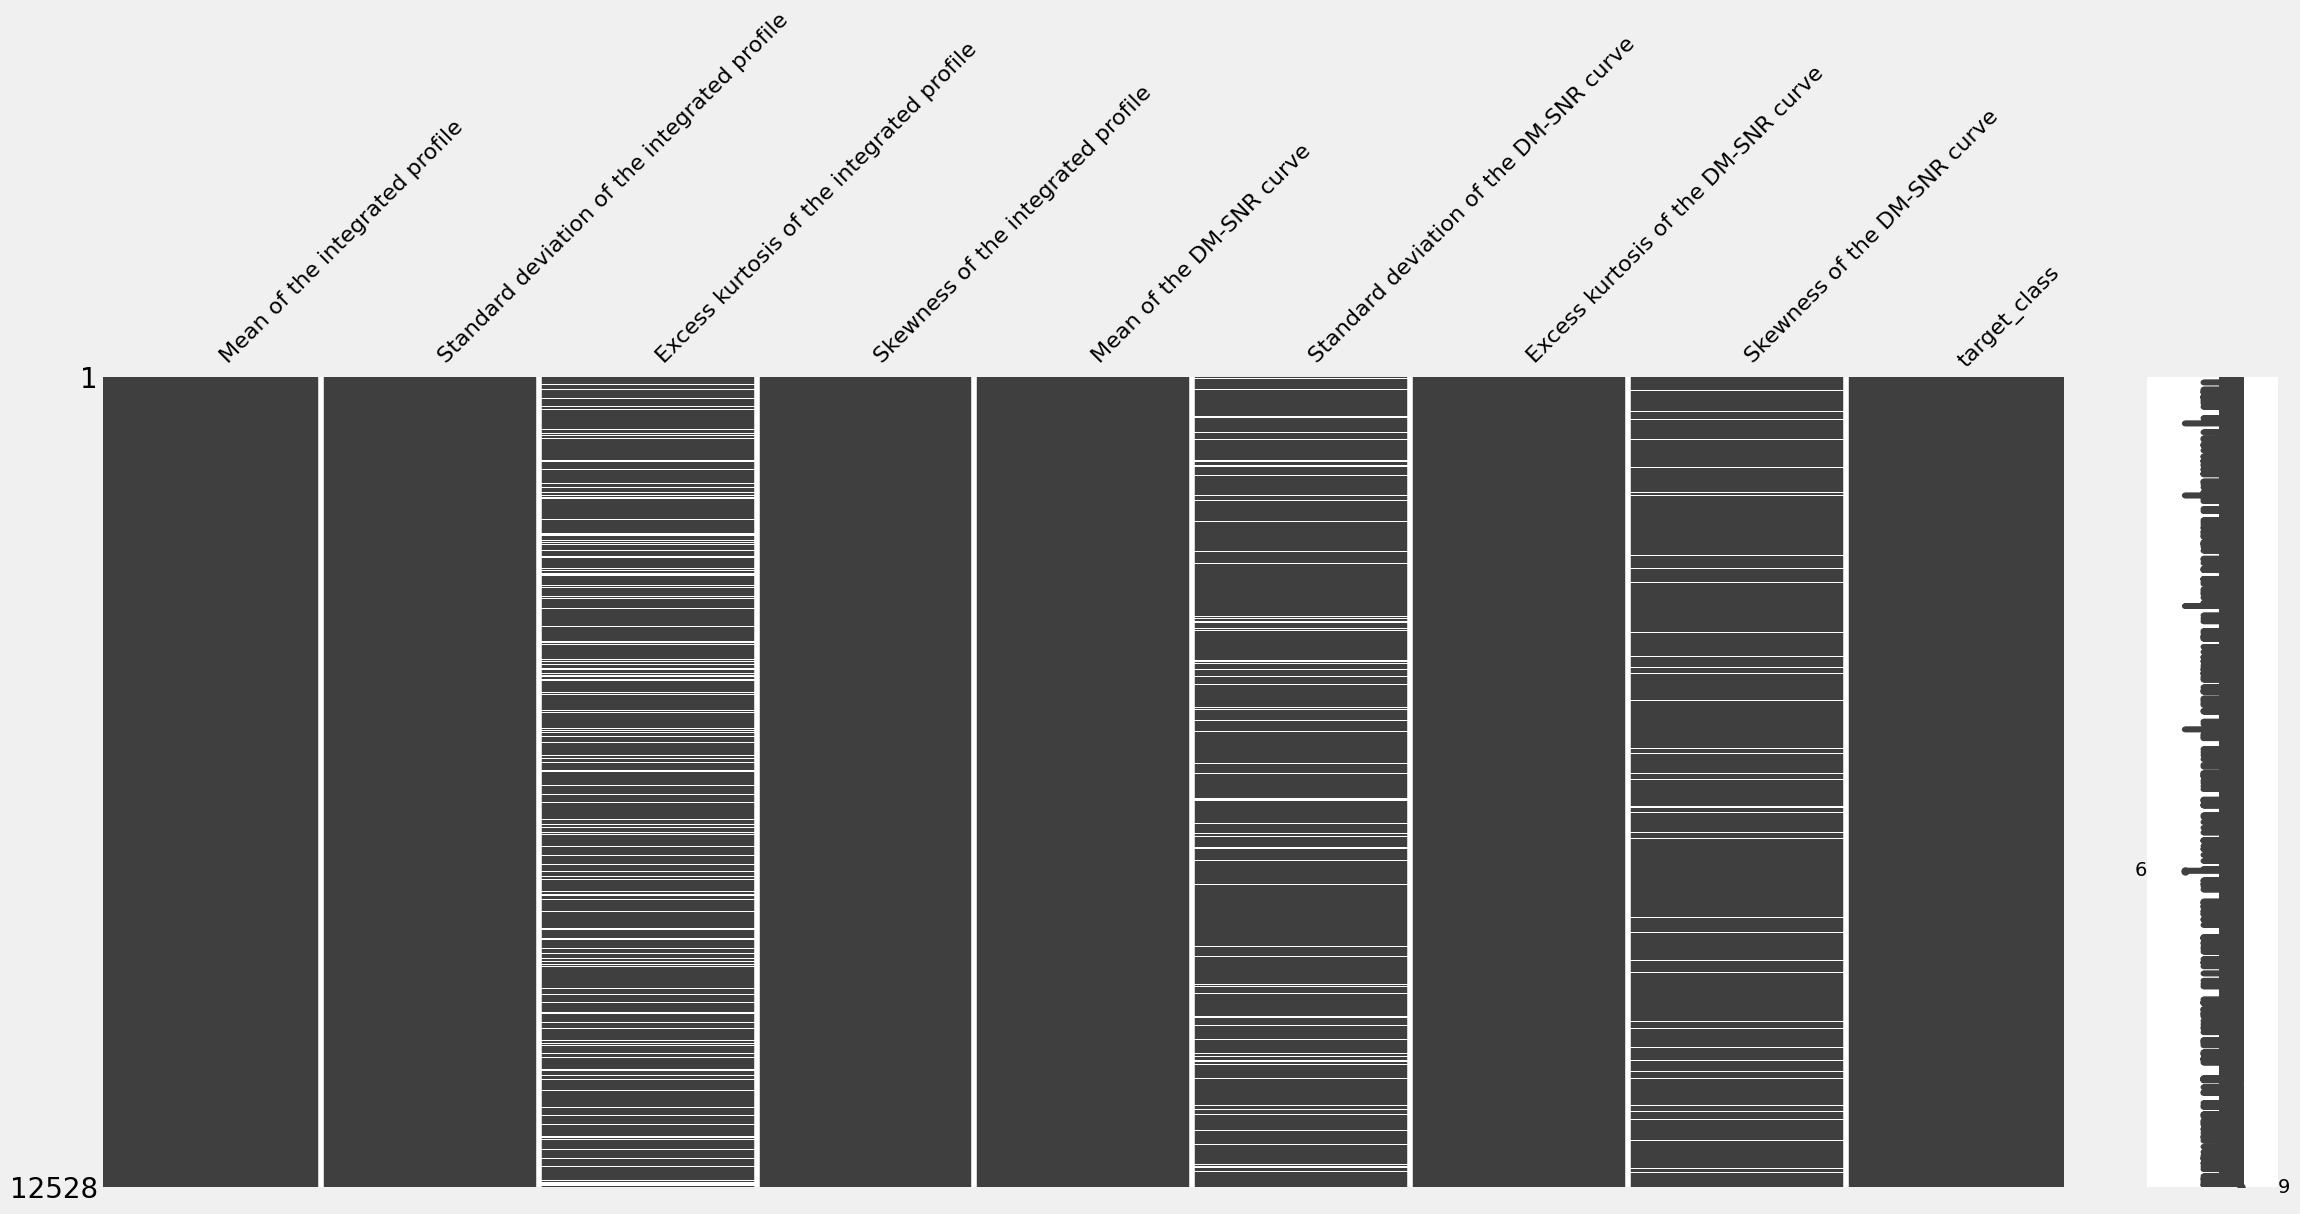

In [41]:
msno.matrix(df_train)

<Axes: >

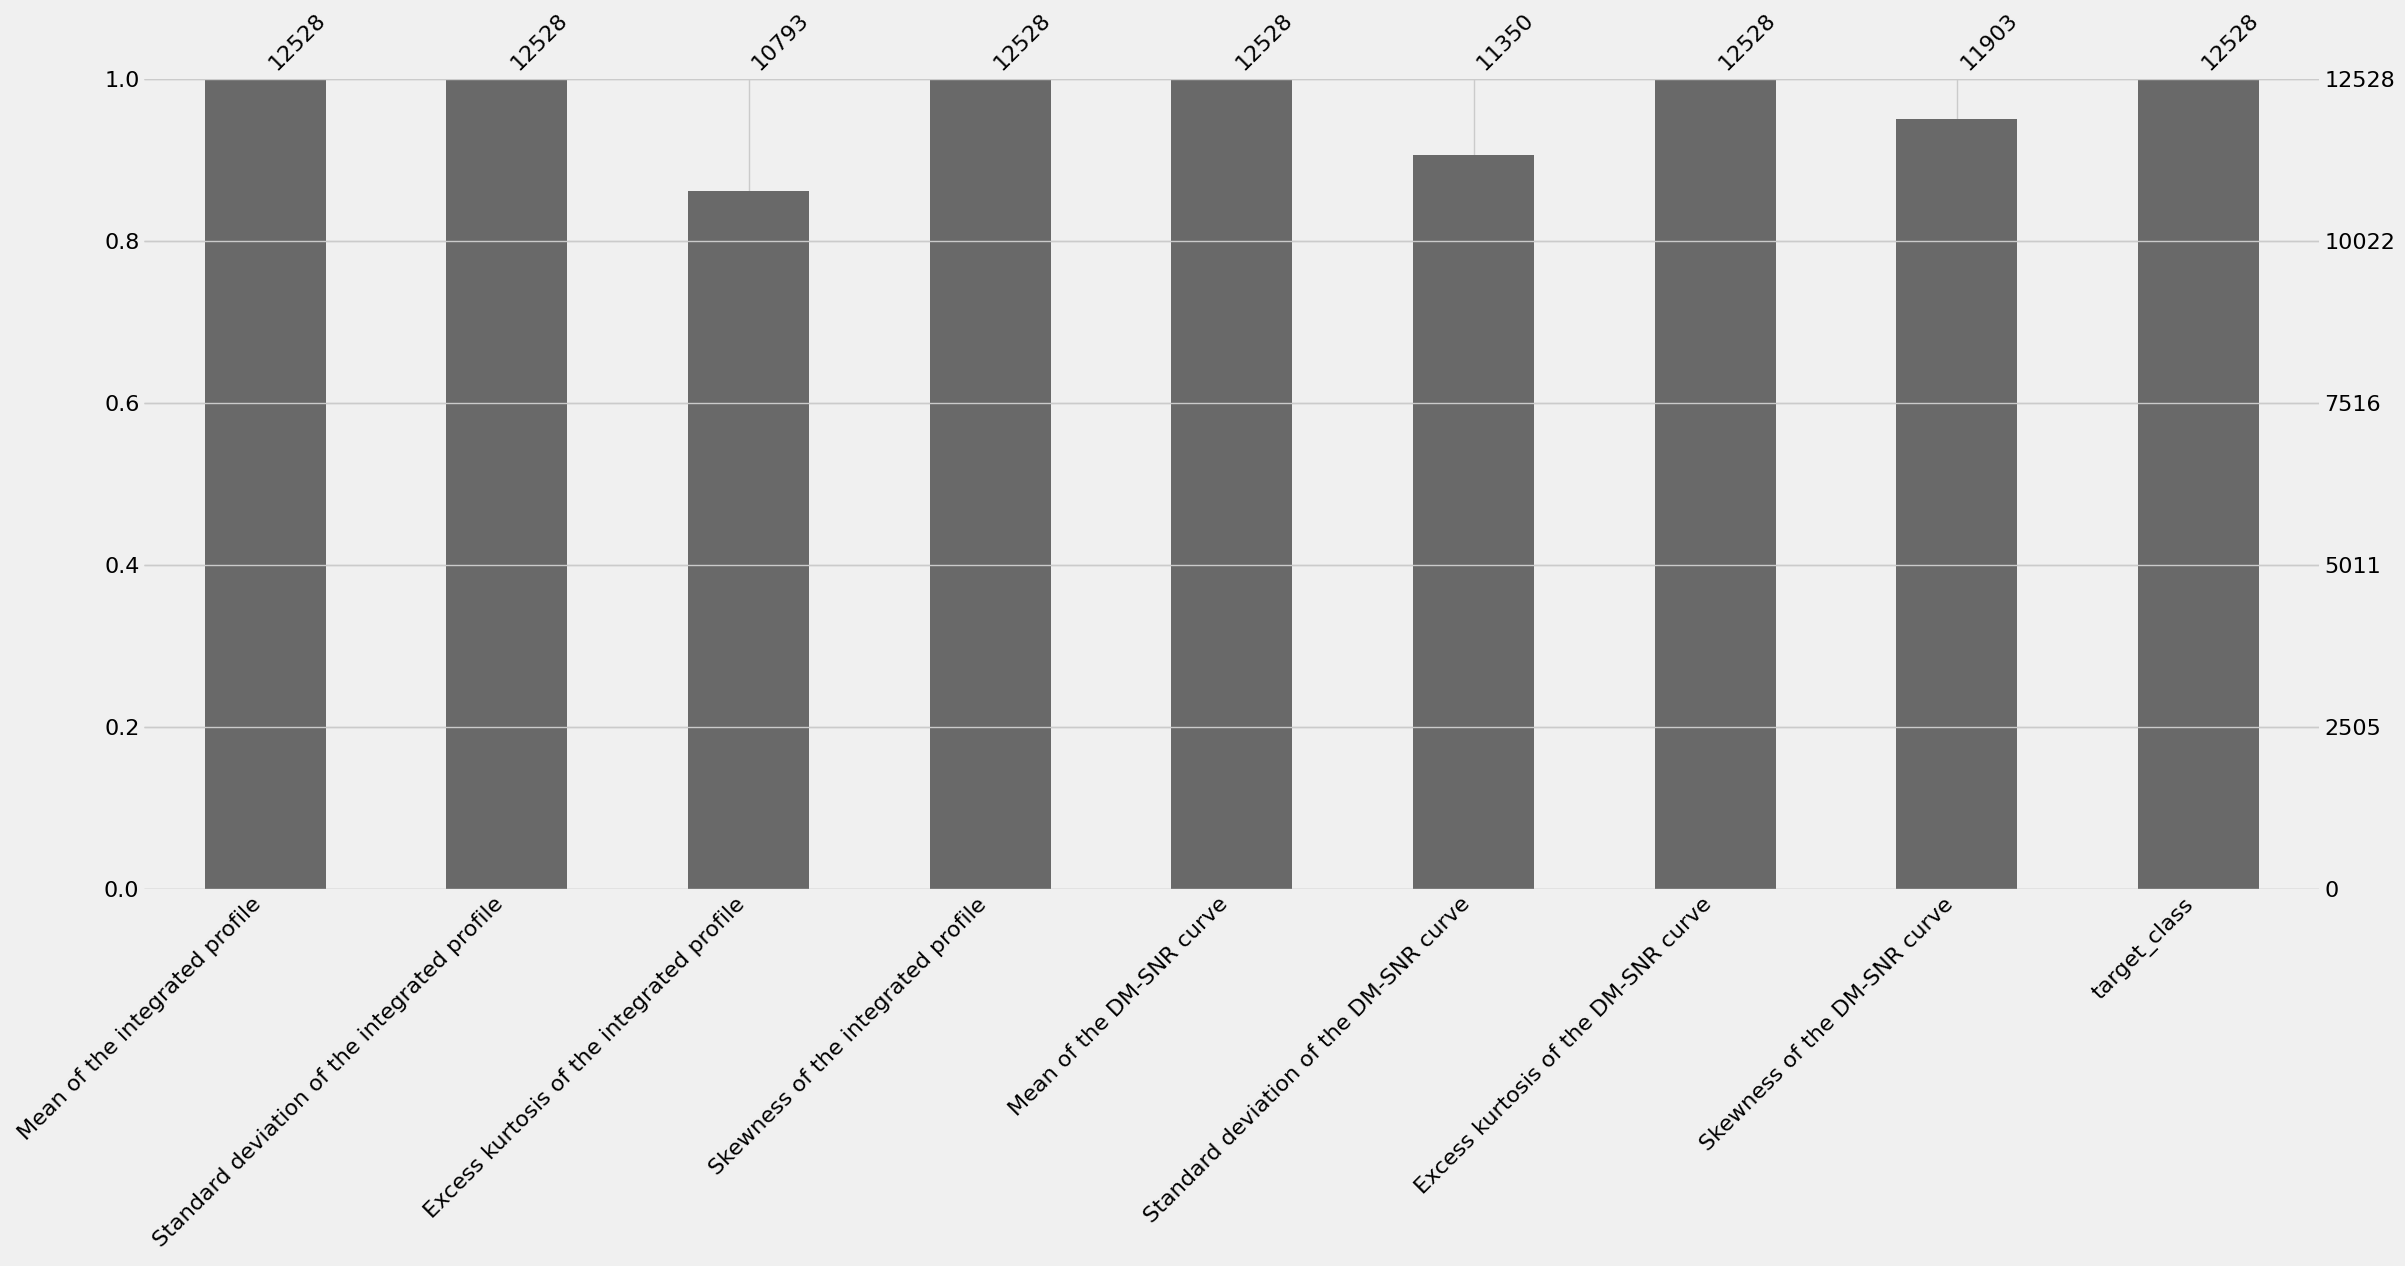

In [42]:
msno.bar(df_train)

<Axes: >

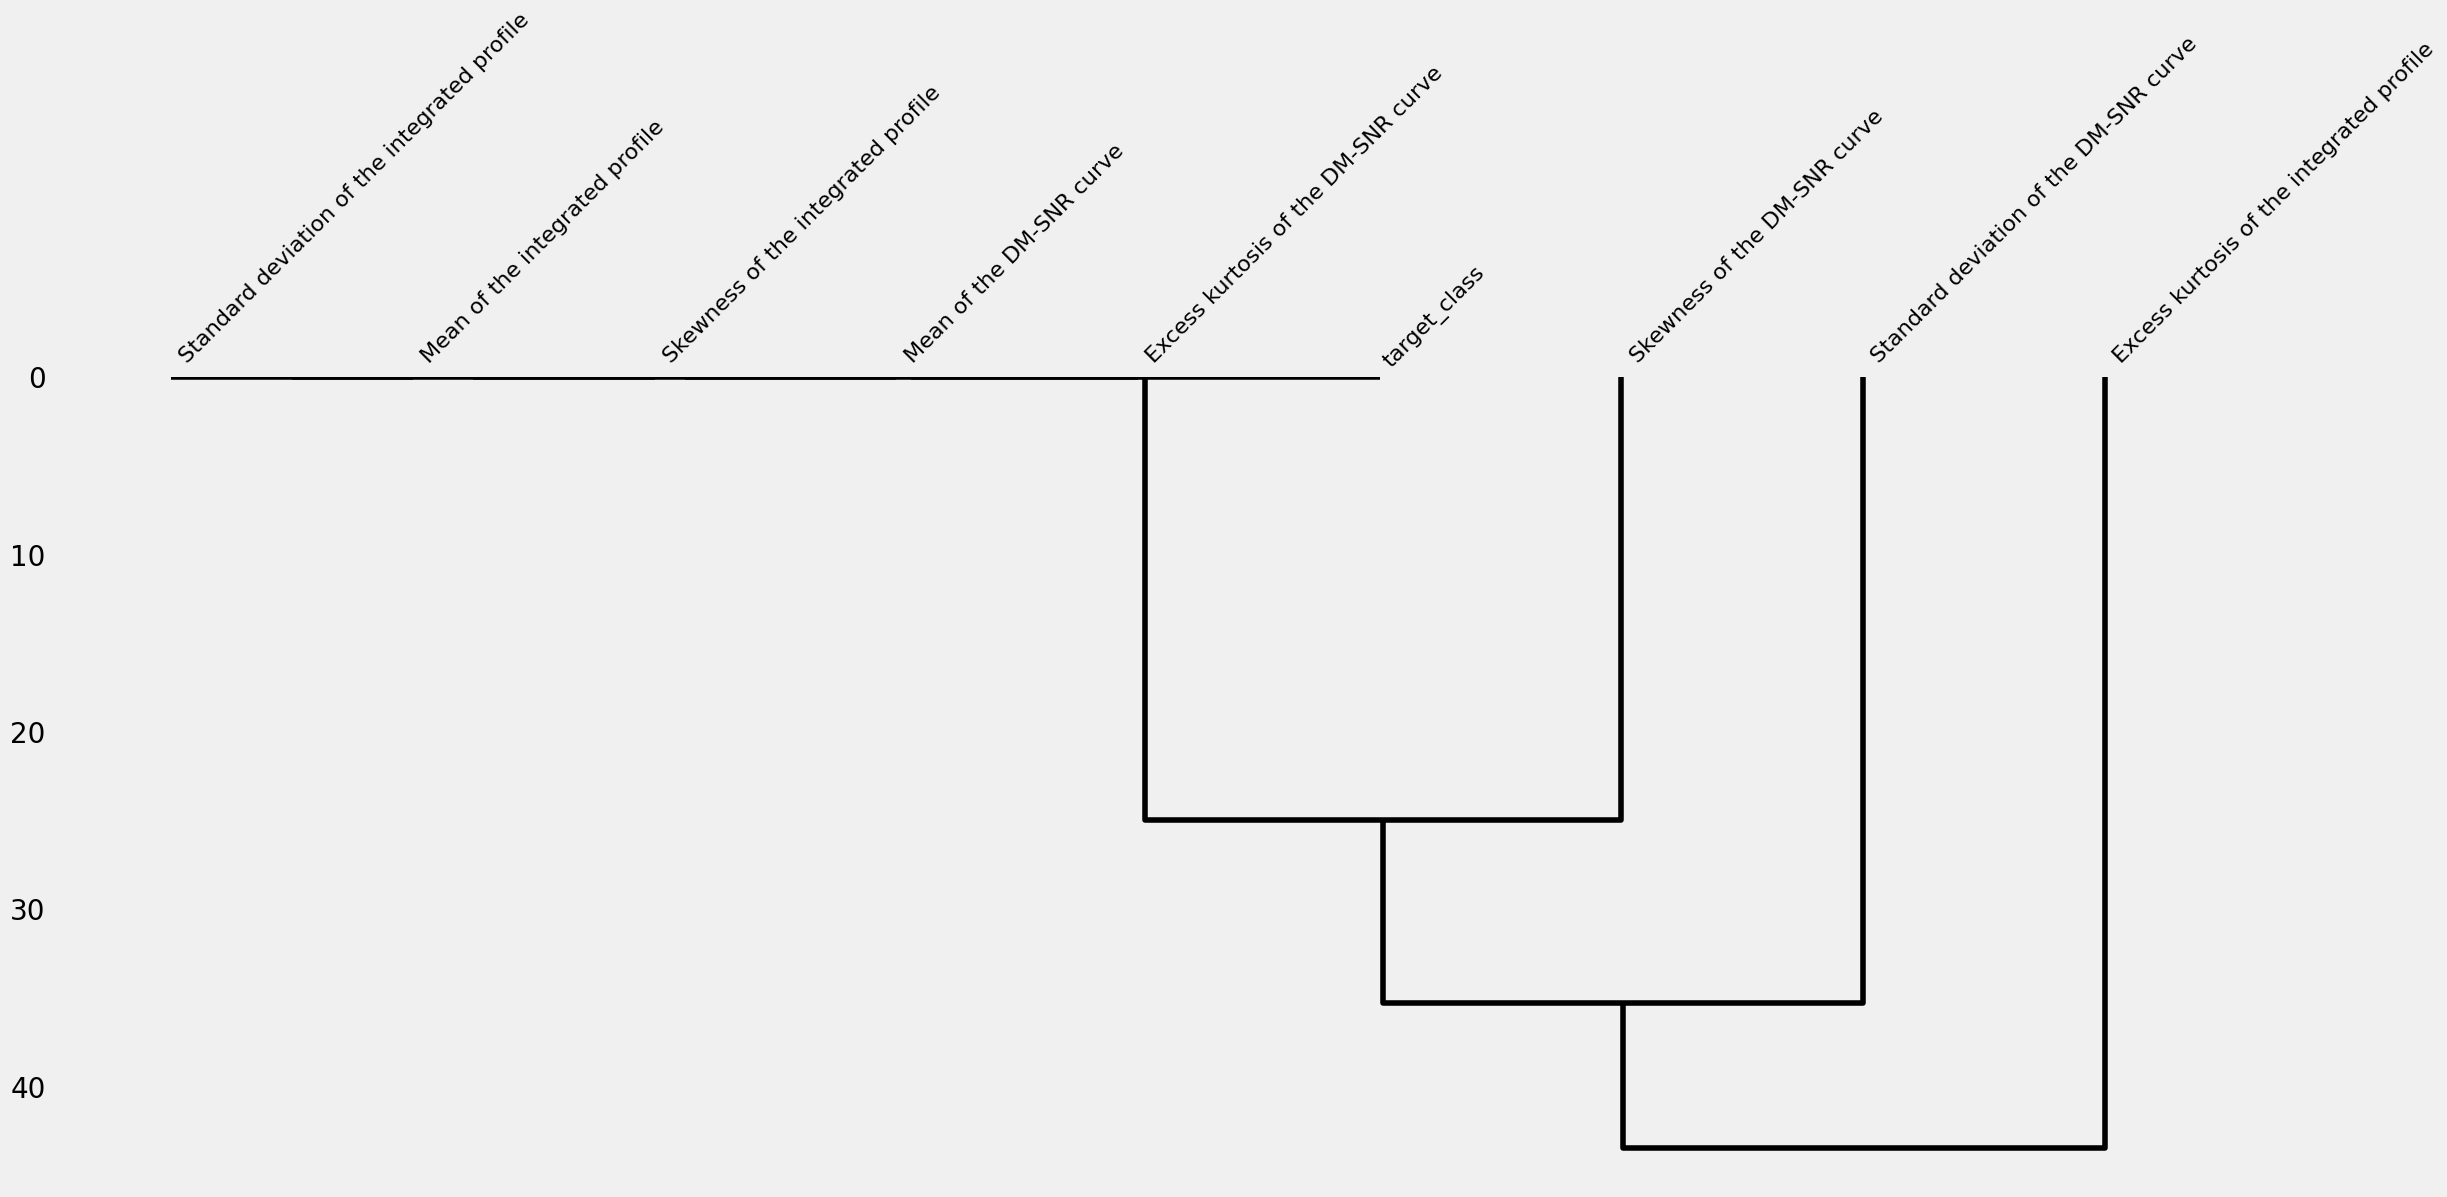

In [43]:
msno.dendrogram(df_train)

In [44]:
cols_nulls=df_train.columns[df_train.isnull().any()].tolist()
df_train[cols_nulls]

,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.375485,18.399367,65.159298
1,0.712898,17.570997,102.722975
2,0.133408,22.362553,74.031324
3,-0.215989,NaN,7.197842
4,0.825013,20.618009,76.291128
...,...,...,...
12523,-0.012418,29.308266,21.725143
12524,0.218177,NaN,34.357283
12525,0.663456,11.628149,312.204325
12526,-0.089940,21.501505,62.334018


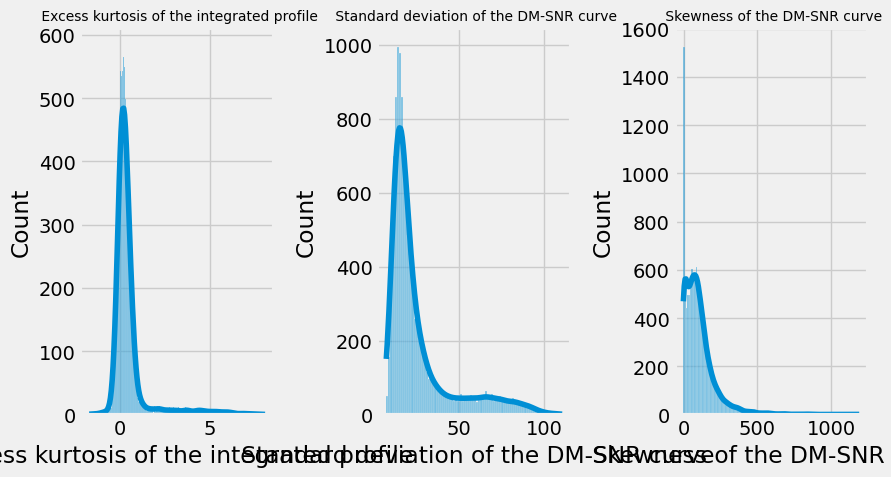

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(9, 5))
for i, (col,ax) in enumerate(zip(cols_nulls,axs.flat)):
    sns.histplot(data=df_train,x=col,ax=ax,kde=True)
    ax.set_title(col,fontsize=10)
plt.tight_layout()
plt.show()

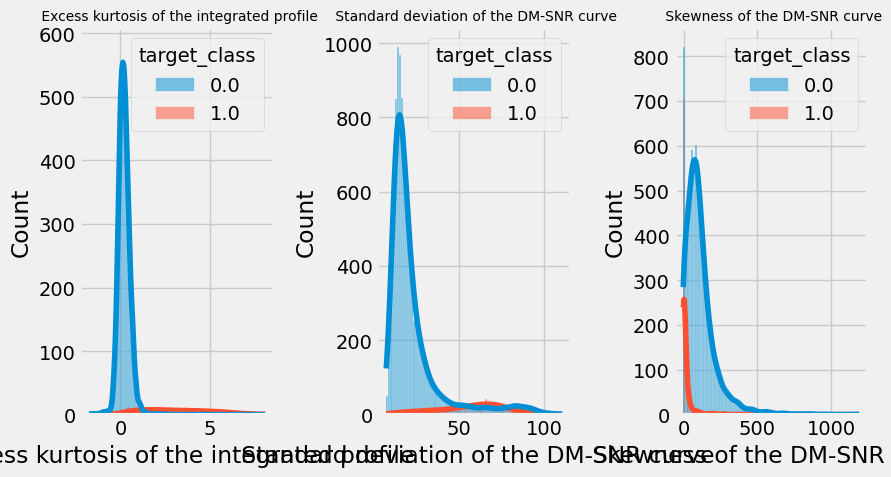

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(9, 5))
for i, (col,ax) in enumerate(zip(cols_nulls,axs.flat)):
    sns.histplot(data=df_train,x=col,ax=ax,kde=True,hue='target_class')
    ax.set_title(col,fontsize=10)
plt.tight_layout()
plt.show()

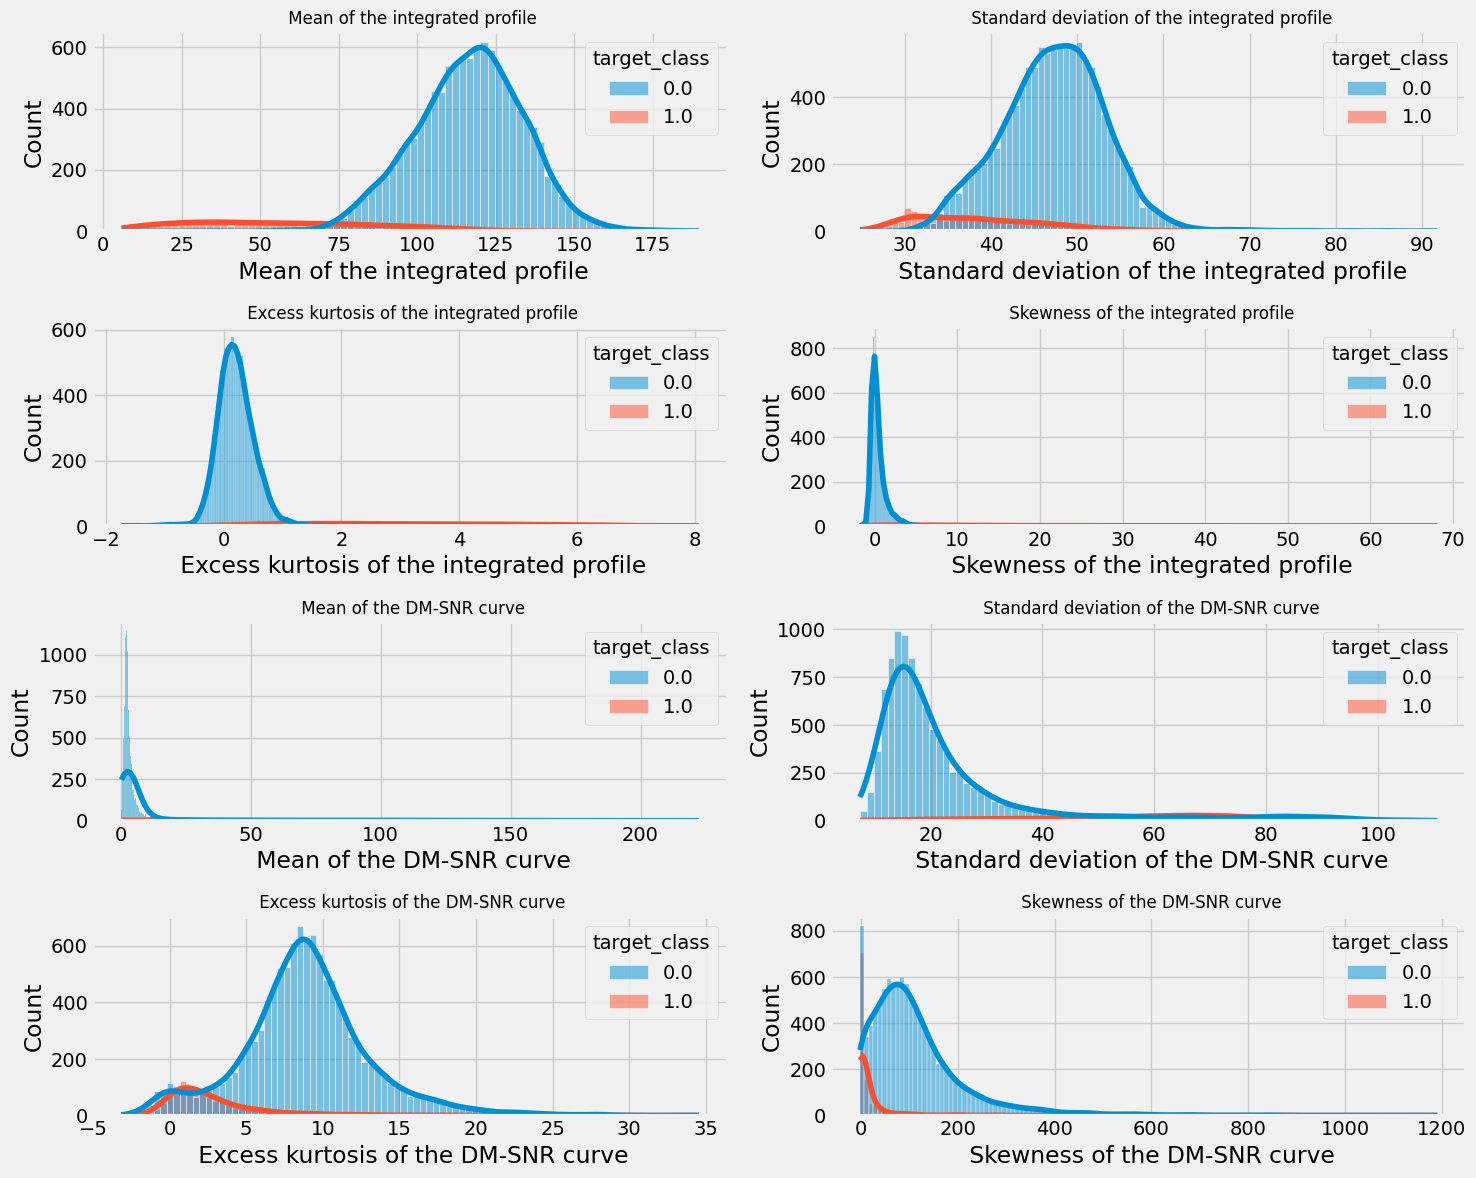

In [49]:
num=[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']

fig, axs = plt.subplots(4, 2, figsize=(15, 12))
for i, (col,ax) in enumerate(zip(num,axs.flat)):
    sns.histplot(data=df_train,x=col,ax=ax,kde=True,hue='target_class')
    ax.set_title(col,fontsize=12)
plt.tight_layout()
plt.show()

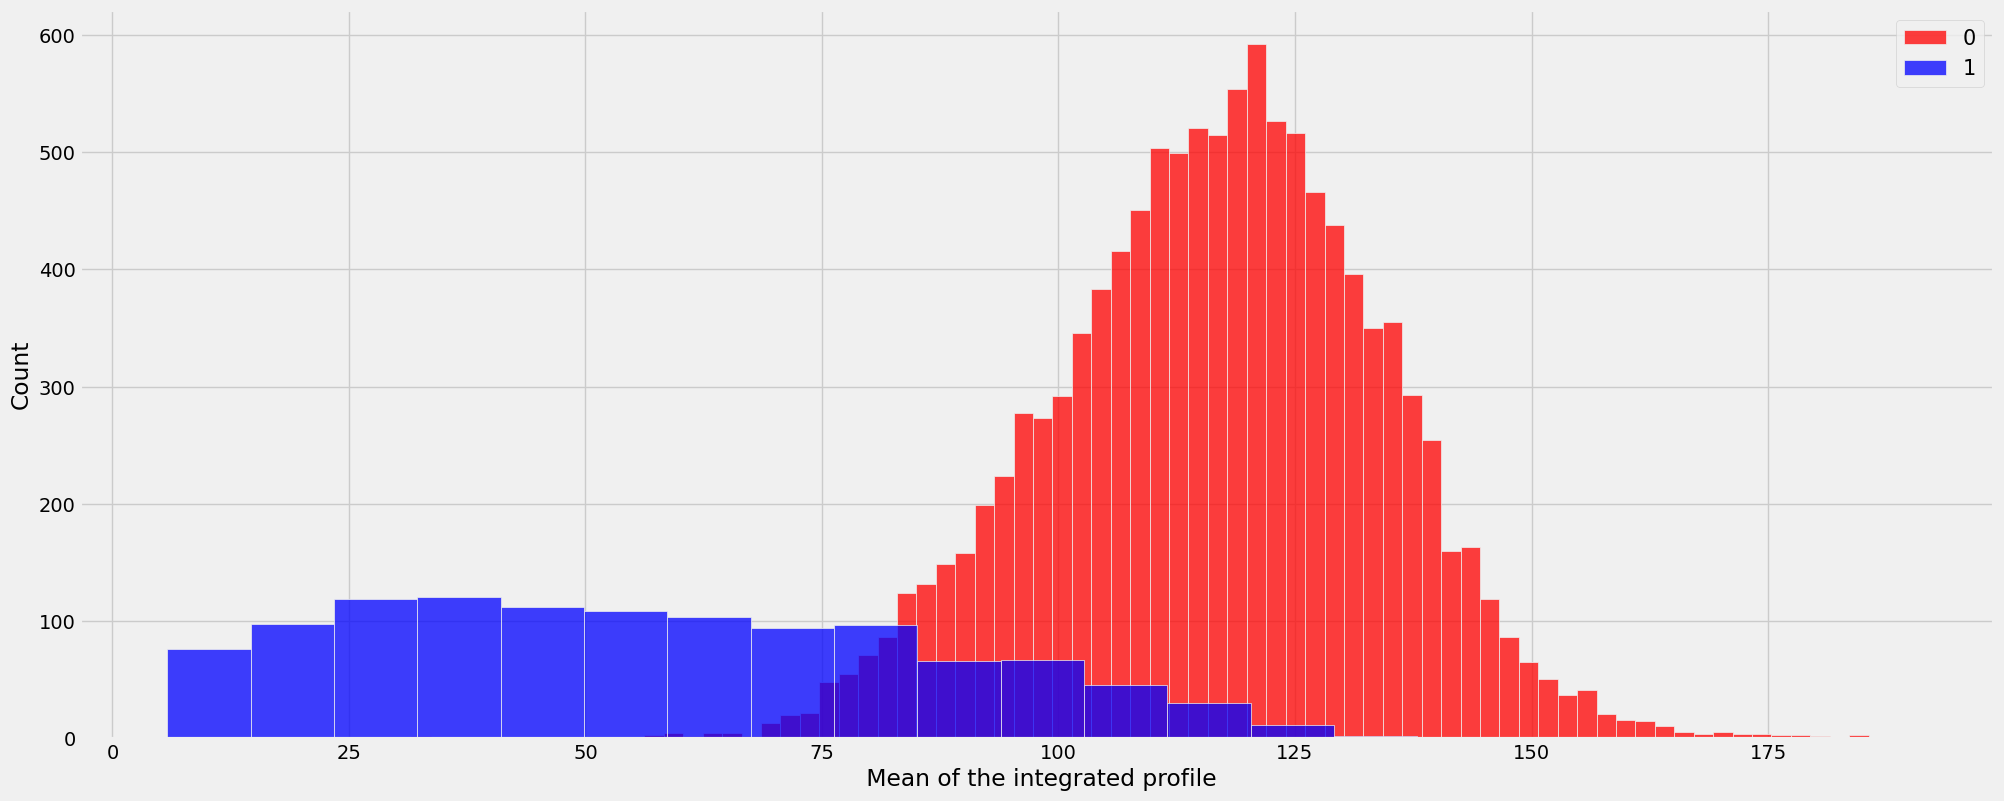

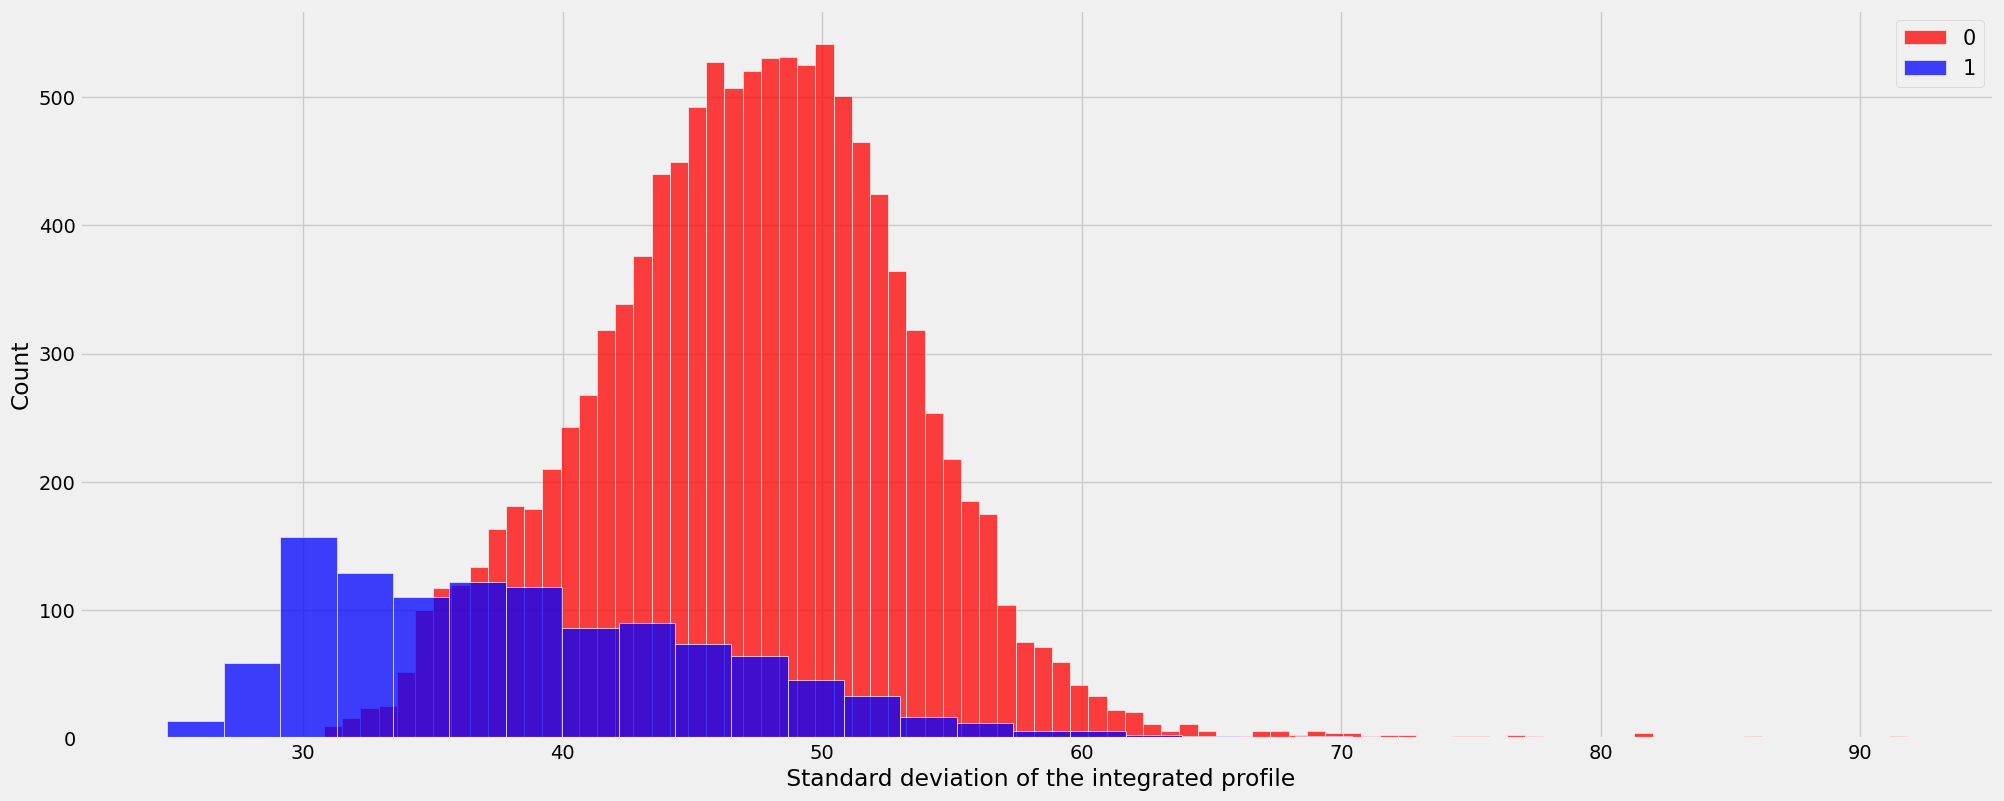

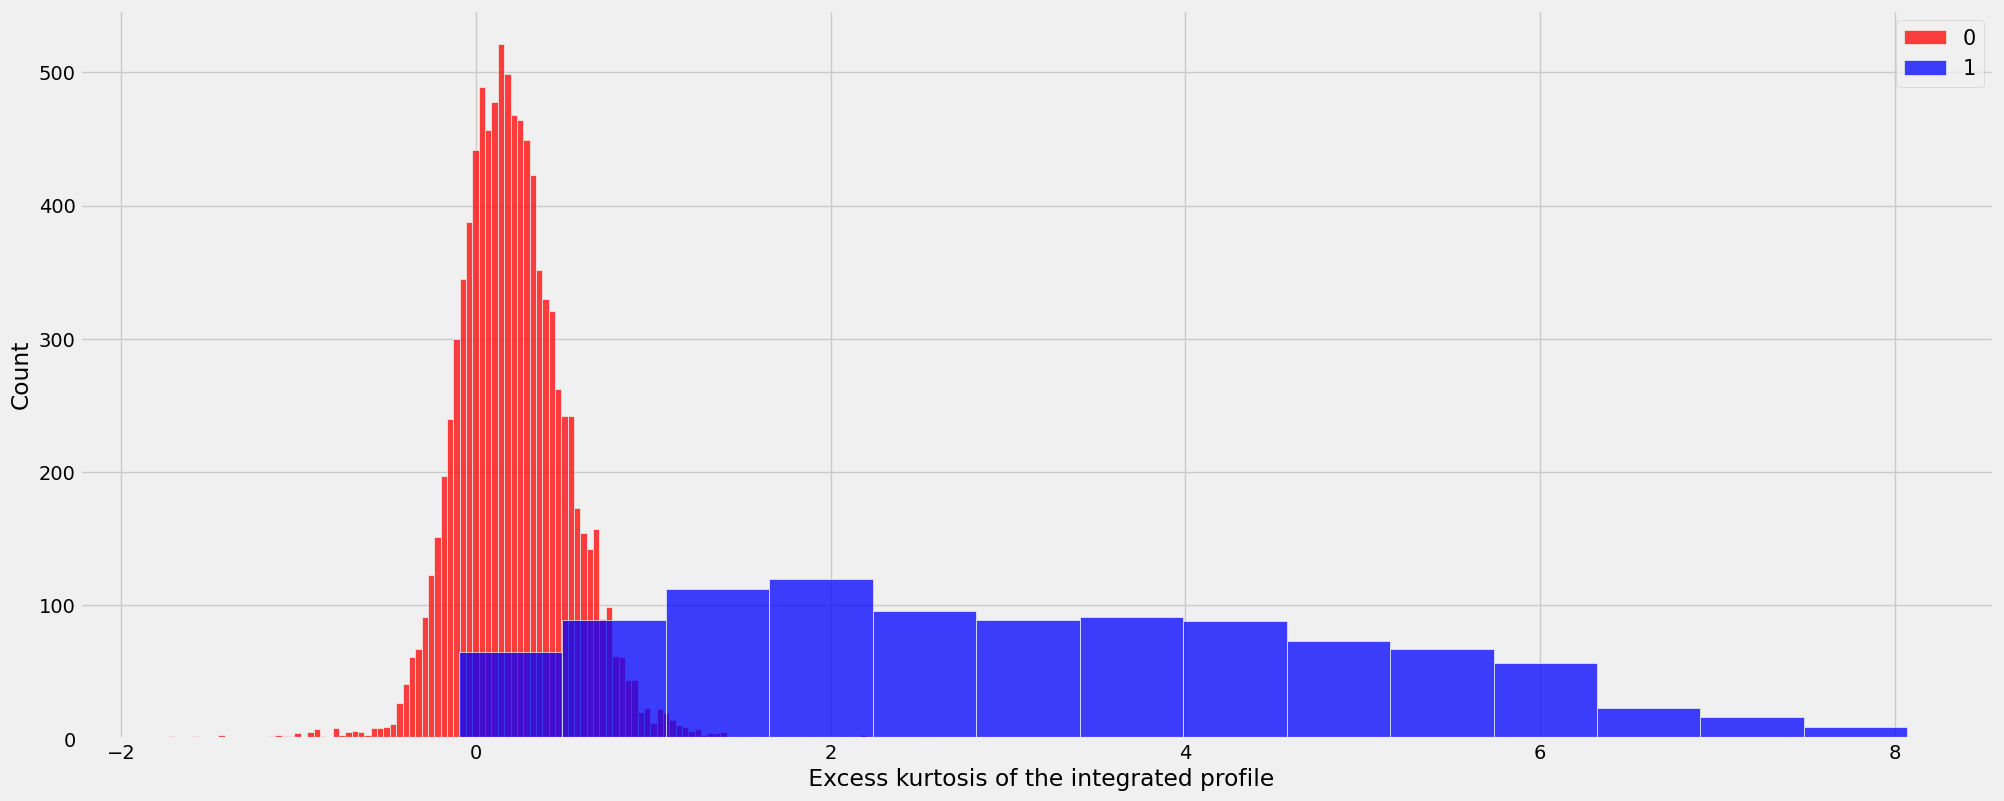

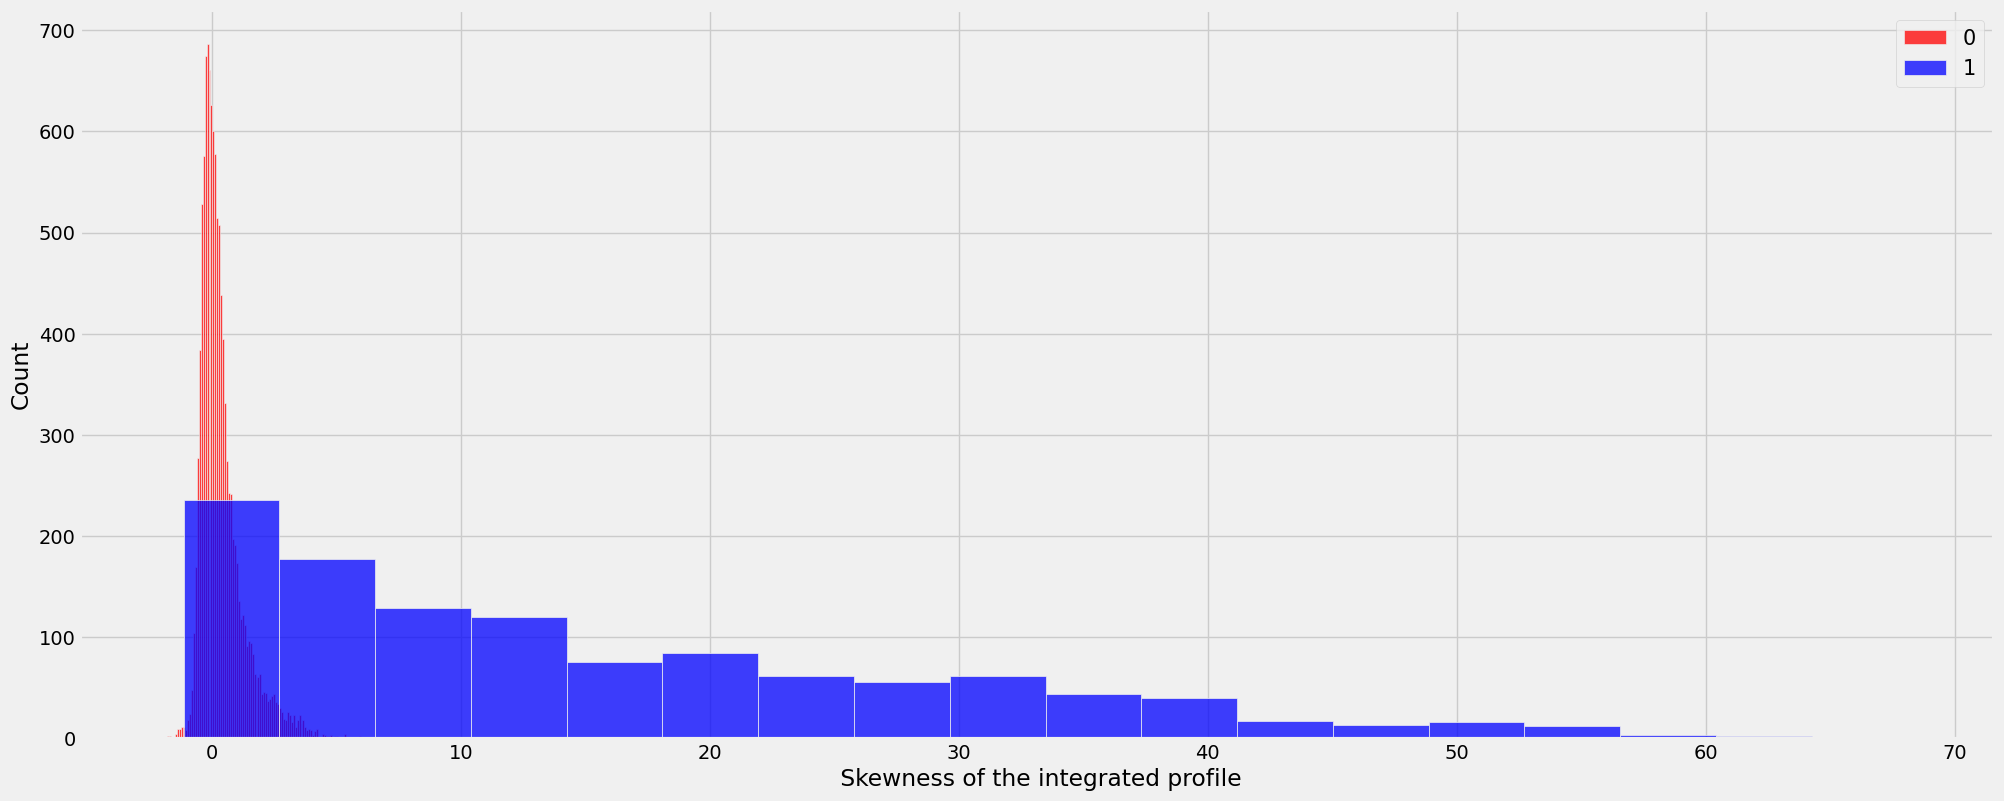

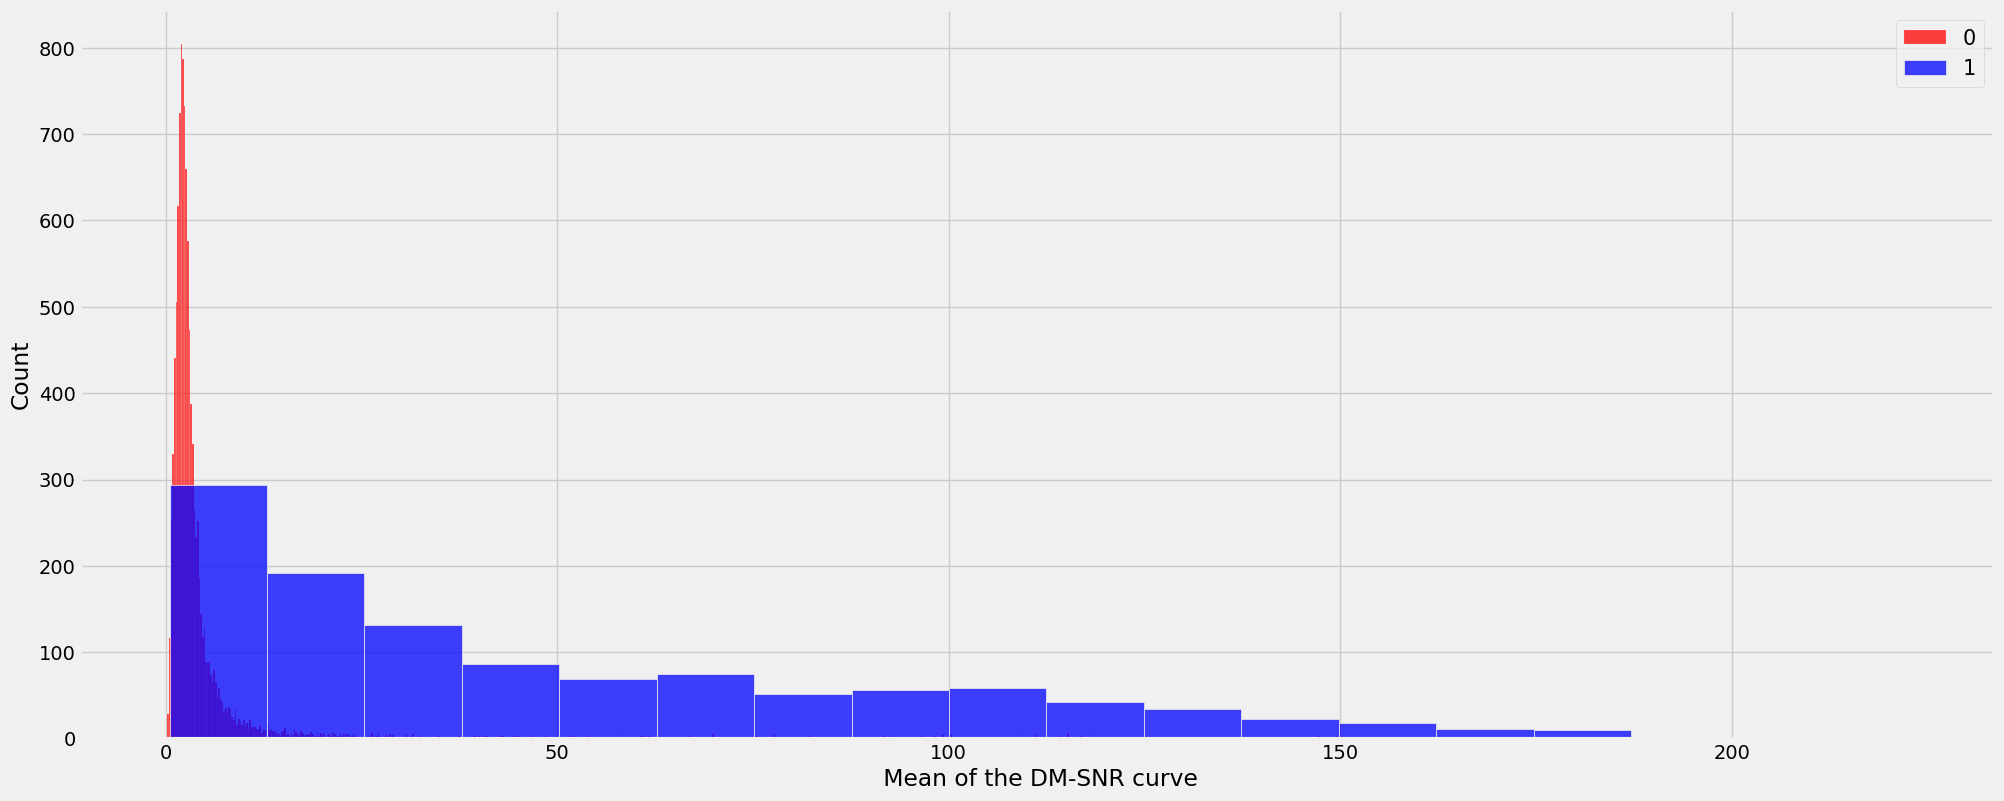

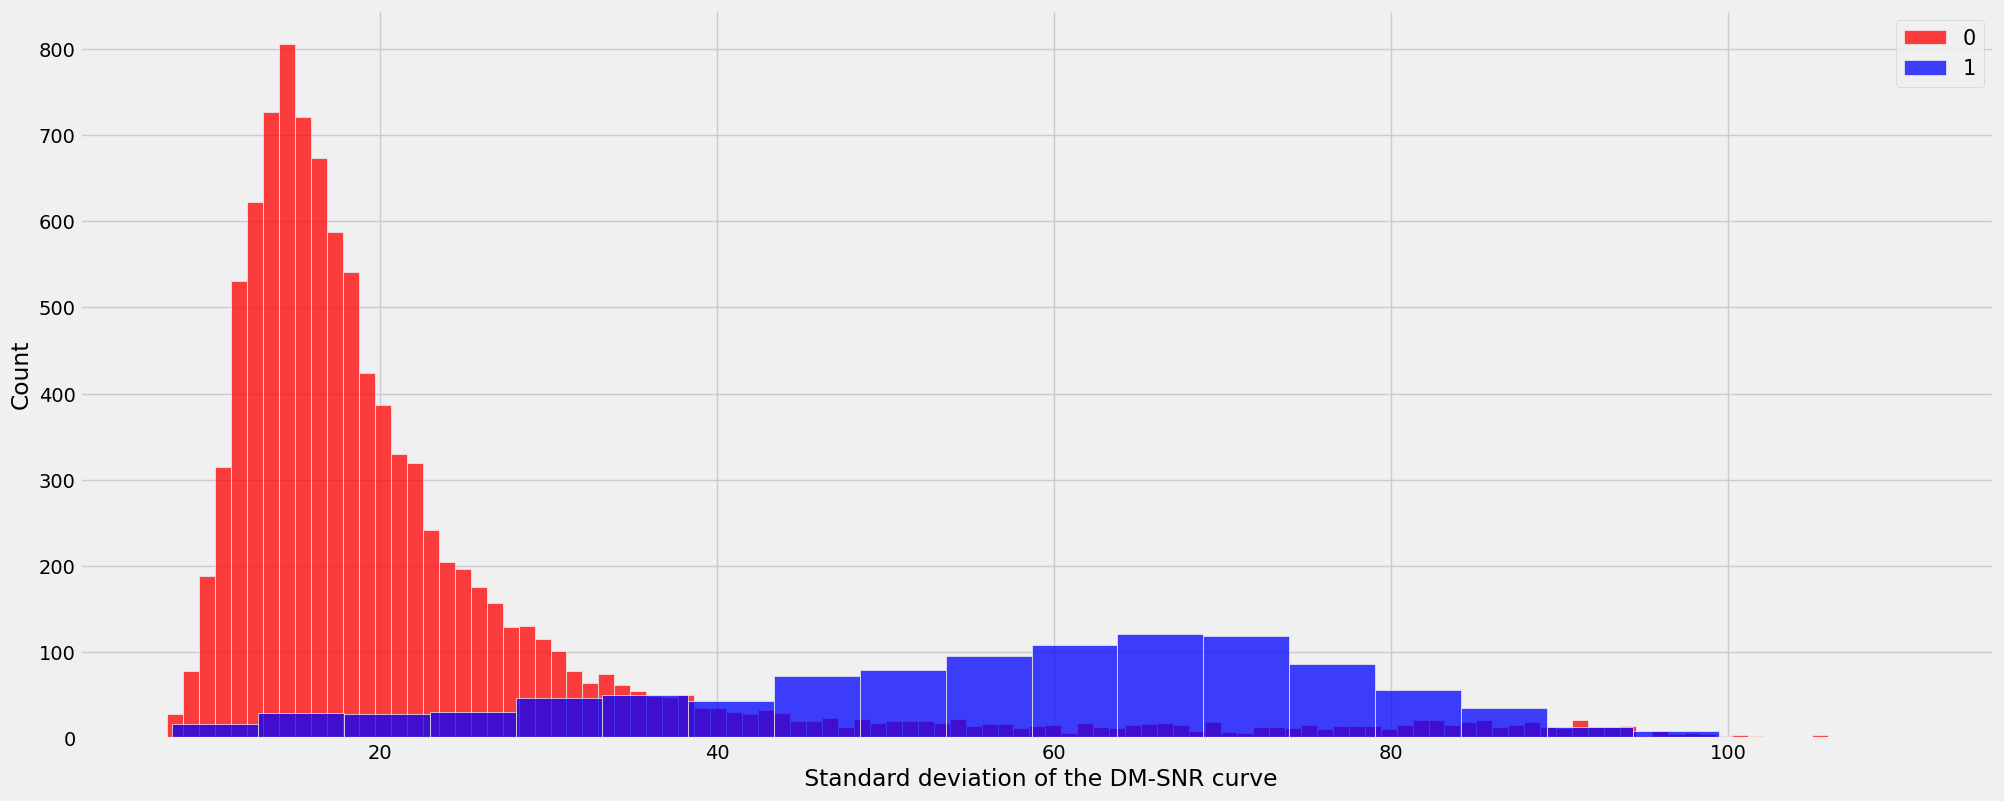

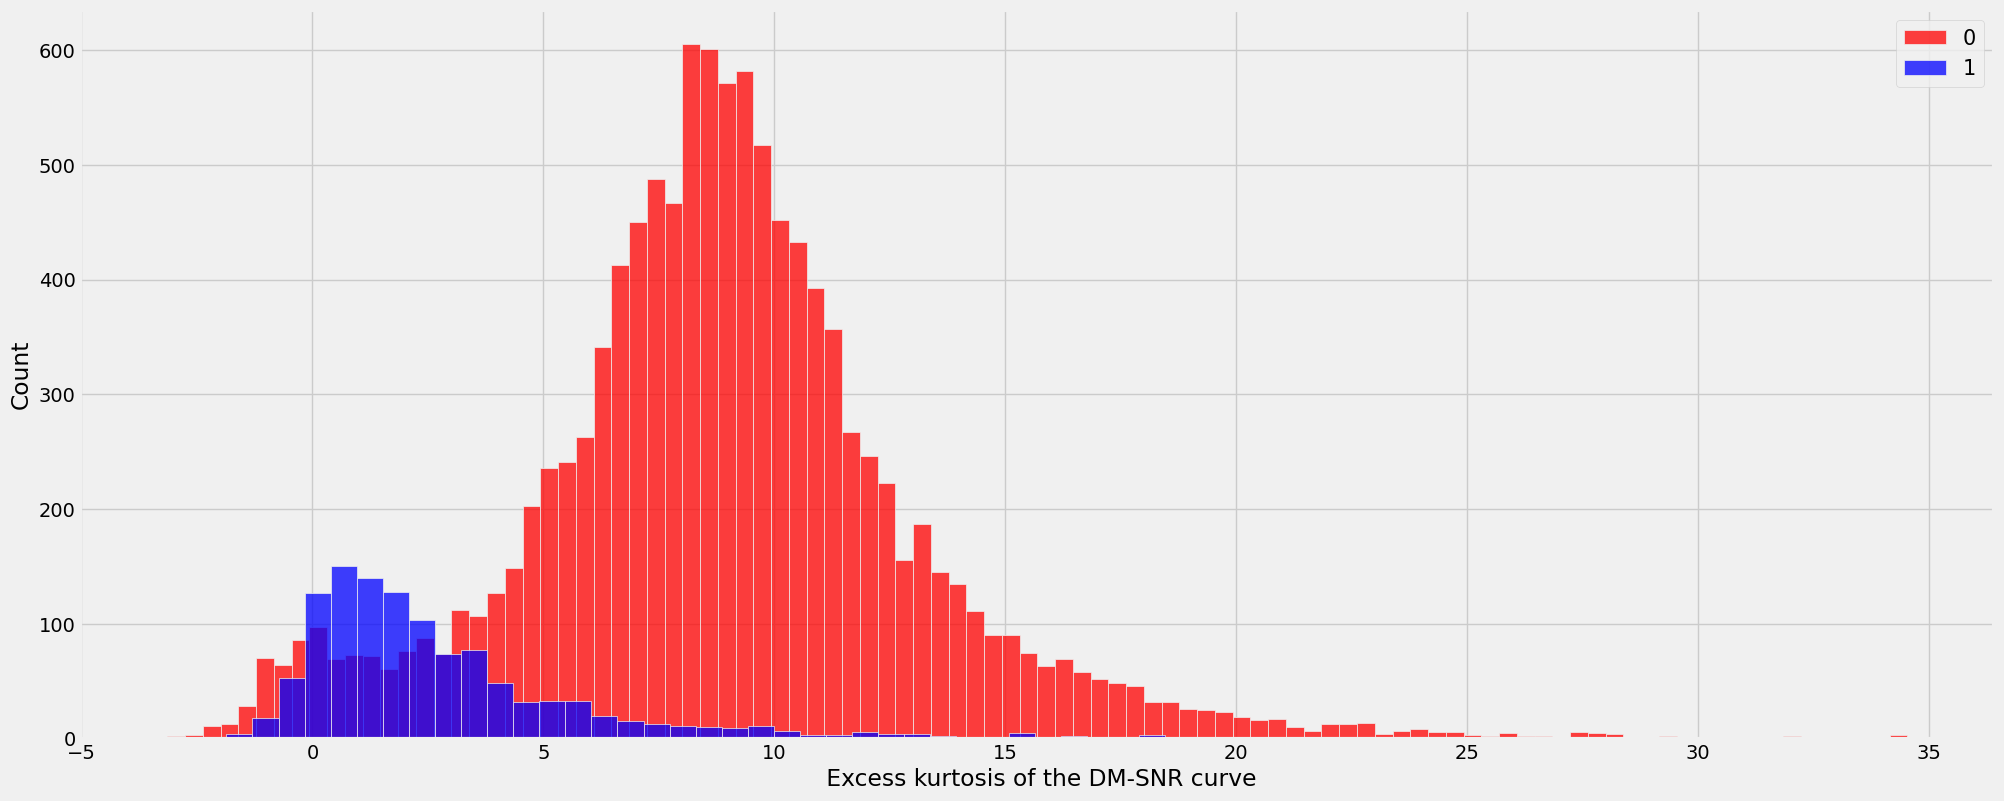

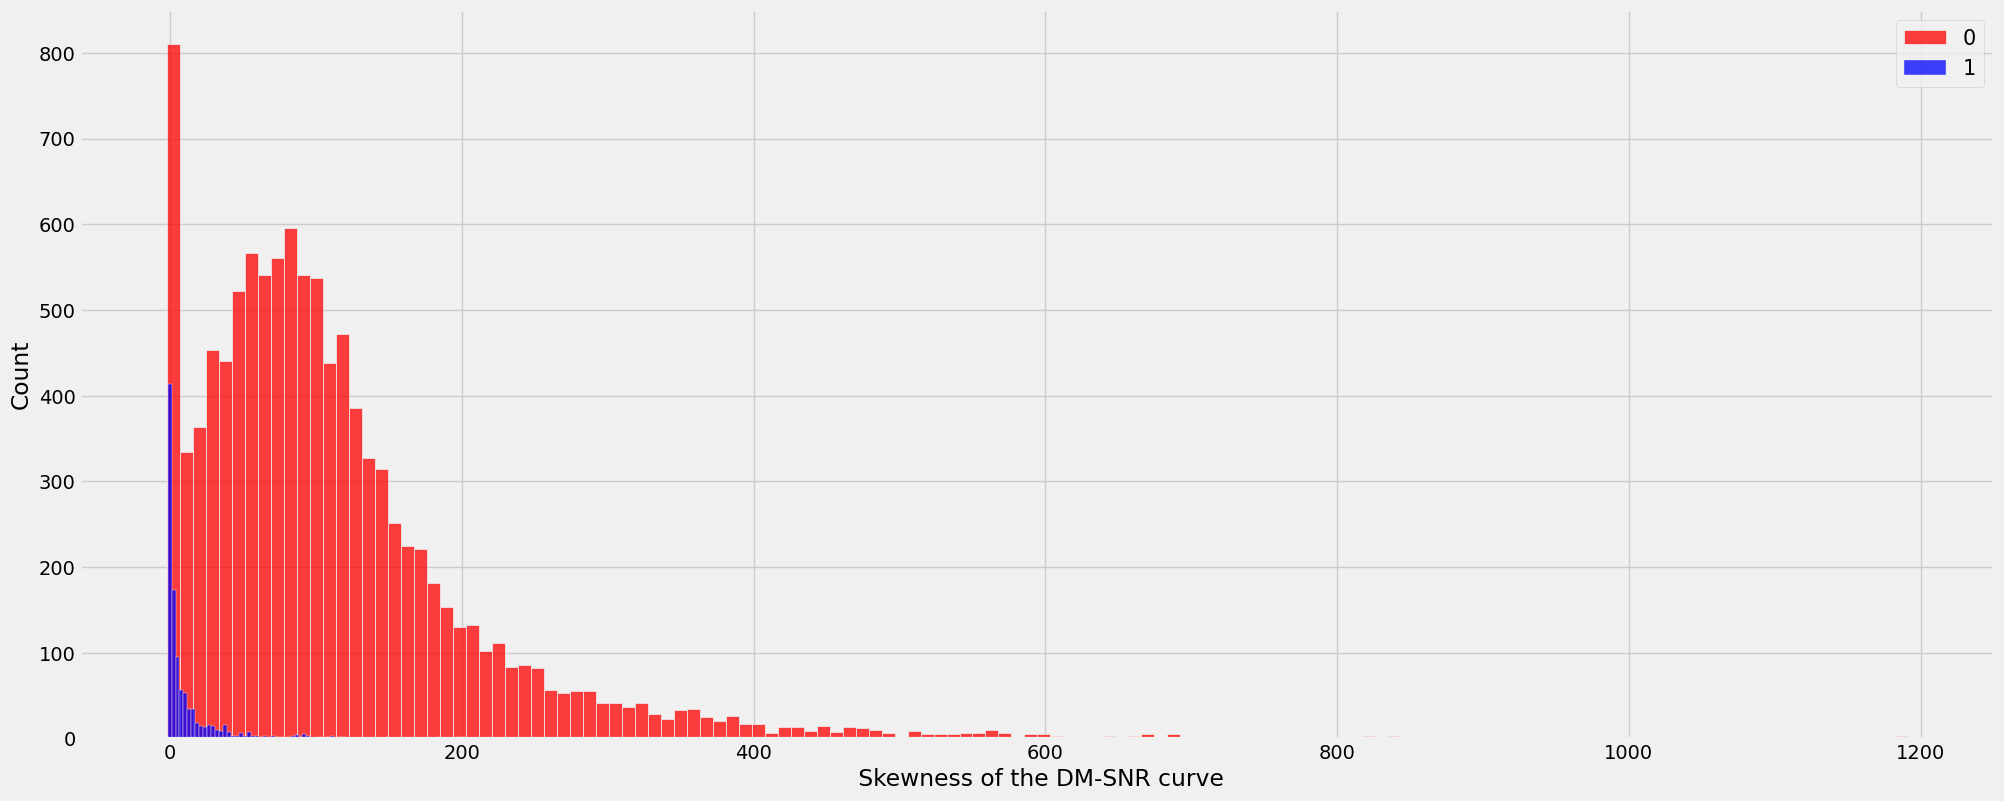

In [50]:
# from matplotlib.ticker import FormatStrFormatter

train_dummy = df_train.copy()
for feature in num:
  fig, axs = plt.subplots(figsize=(22, 9))
  sns.histplot(train_dummy[train_dummy['target_class']==0][feature].dropna(), color='red')
  sns.histplot(train_dummy[train_dummy['target_class']==1][feature].dropna(), color='blue')

  plt.legend([0, 1], loc='upper right', prop={'size': 15})
  plt.show()

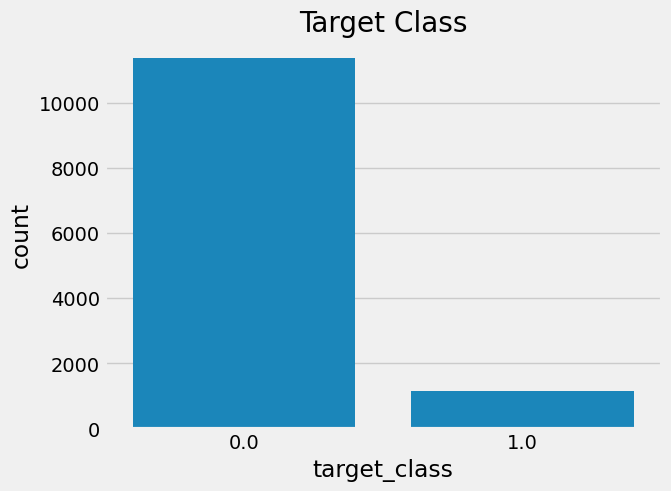

In [51]:
sns.countplot(data=df_train,x='target_class')
plt.title('Target Class')
plt.show()

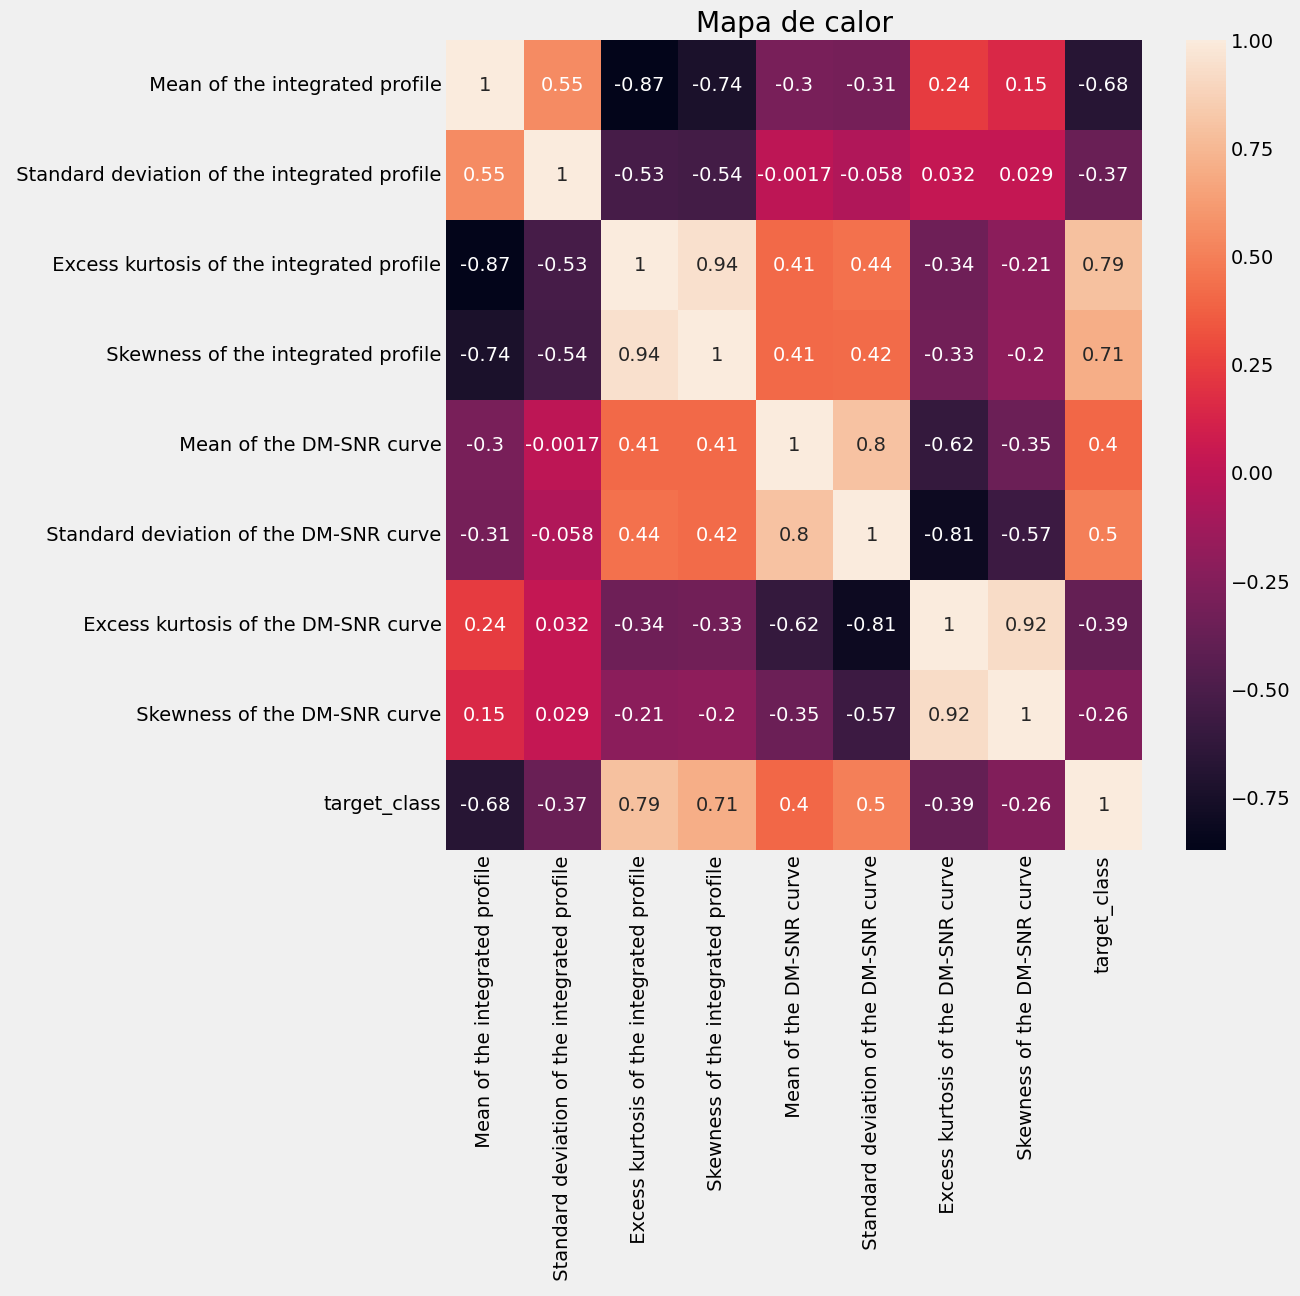

In [52]:
plt.figure(figsize=(10,10))
corr_mat=df_train.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Mapa de calor')
plt.show()

## **Datos Nulos**

In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, SGDRegressor, ARDRegression

imputer=IterativeImputer(BayesianRidge(), sample_posterior=True, max_iter=100, verbose=1)
impute_data = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns.values.tolist())

[IterativeImputer] Completing matrix with shape (12528, 9)


In [55]:
df_train[cols_nulls].describe(include='all')

,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
count,10793.000000,11350.000000,11903.000000
mean,0.478548,26.351318,105.525779
std,1.064708,19.610842,107.399585
min,-1.738021,7.370432,-1.976976
25%,0.024652,14.404353,35.199899
50%,0.223678,18.412402,83.126301
75%,0.473125,28.337418,139.997850
max,8.069522,110.642211,1191.000837


In [57]:
impute_data[cols_nulls].describe(include='all')

,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
count,12528.000000,12528.000000,12528.000000
mean,0.480424,26.306719,105.759278
std,1.065725,19.544651,107.440098
min,-1.738021,-18.798432,-78.878839
25%,0.023981,14.355185,35.189085
50%,0.225427,18.614942,83.281014
75%,0.482815,28.954928,140.803060
max,8.069522,110.642211,1191.000837


In [58]:
impute_data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [59]:
impute_data['target_class'].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

## **Outliers**

In [60]:
Q1=df_train.quantile(0.25)
Q3=df_train.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers (Percentage):')
((df_train < (lower_range)) | (df_train > (upper_range))).sum()

Number of Outliers (Percentage):


 Mean of the integrated profile                   717
 Standard deviation of the integrated profile     178
 Excess kurtosis of the integrated profile        973
 Skewness of the integrated profile              1340
 Mean of the DM-SNR curve                        2047
 Standard deviation of the DM-SNR curve          1506
 Excess kurtosis of the DM-SNR curve              349
 Skewness of the DM-SNR curve                     611
target_class                                     1153
dtype: int64

In [61]:
Q1 = impute_data.quantile(0.25)
Q3 = impute_data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers (Percentage):')
((impute_data < (lower_range)) | (impute_data > (upper_range))).sum()/len(impute_data) * 100

Number of Outliers (Percentage):


 Mean of the integrated profile                   5.723180
 Standard deviation of the integrated profile     1.420817
 Excess kurtosis of the integrated profile        8.947957
 Skewness of the integrated profile              10.696041
 Mean of the DM-SNR curve                        16.339400
 Standard deviation of the DM-SNR curve          12.619732
 Excess kurtosis of the DM-SNR curve              2.785760
 Skewness of the DM-SNR curve                     5.060664
target_class                                      9.203384
dtype: float64

In [64]:
train_impute_out = impute_data.copy()
for cols in train_impute_out.columns[:-1]:
  train_impute_out[cols] = np.where(train_impute_out[cols]>upper_range[cols],
                                    upper_range[cols],train_impute_out[cols])
  train_impute_out[cols] = np.where(train_impute_out[cols]<lower_range[cols],
                                    lower_range[cols],train_impute_out[cols])

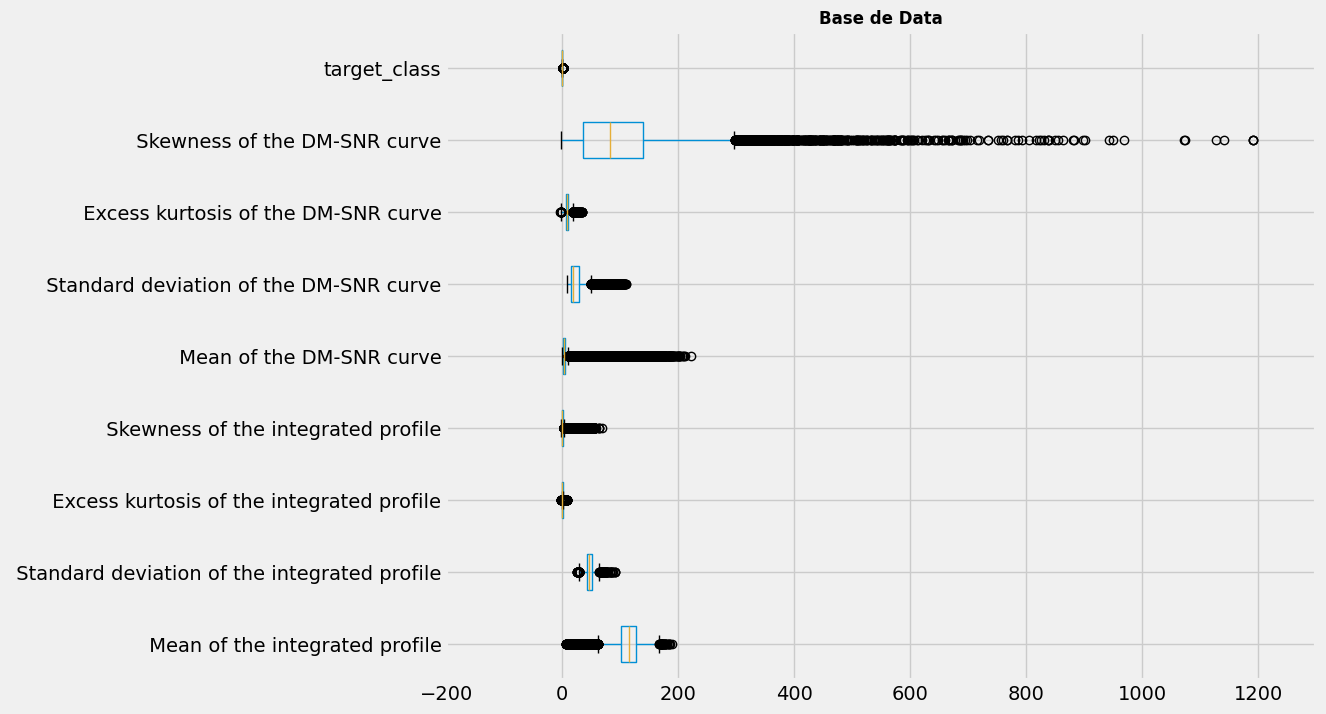

In [69]:
cols_1=[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class']
plt.figure(figsize=(10,8))
plt.title('Base de Data',fontsize=12,weight='bold')
df_train.boxplot(vert=0,column=cols_1)
plt.xlim(-200, 1300)
plt.show()

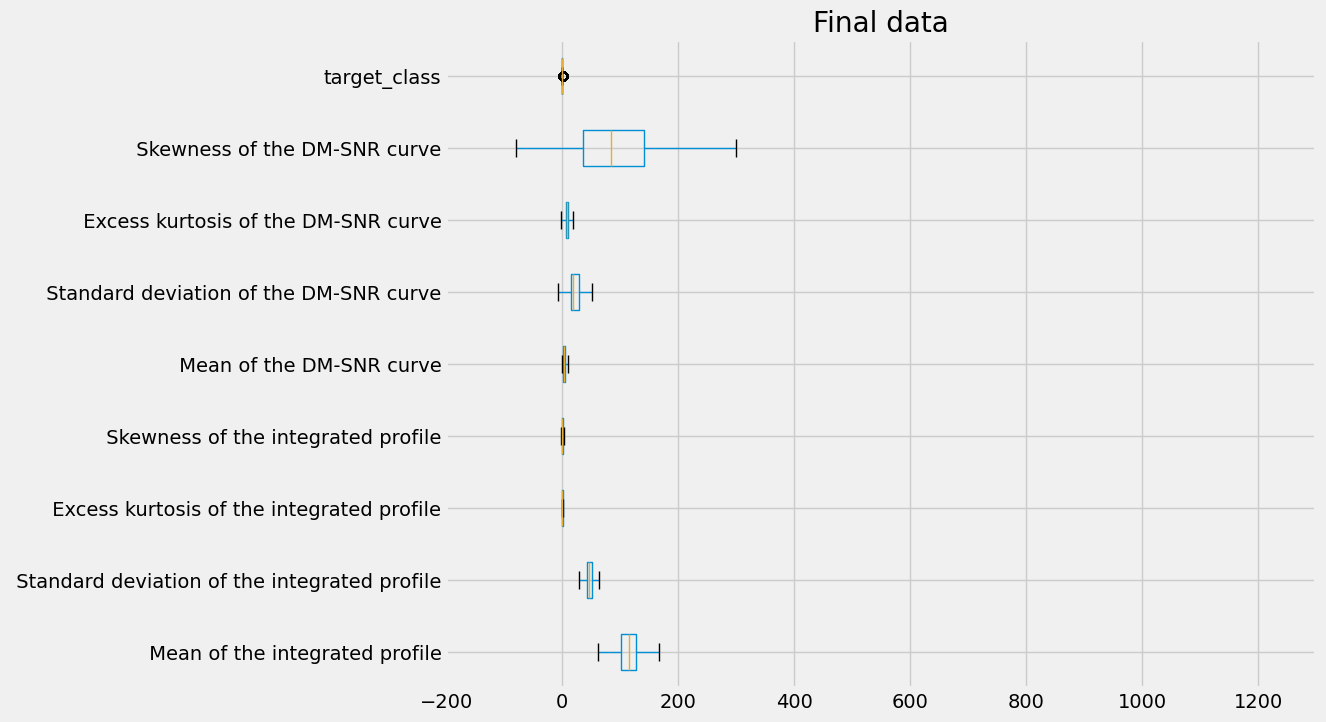

In [71]:
plt.figure(figsize=(10,8))
plt.title('Final data')
train_impute_out.boxplot(vert=0, column=cols_1)
plt.xlim(-200, 1300)
plt.show()

## **Feature Selection**

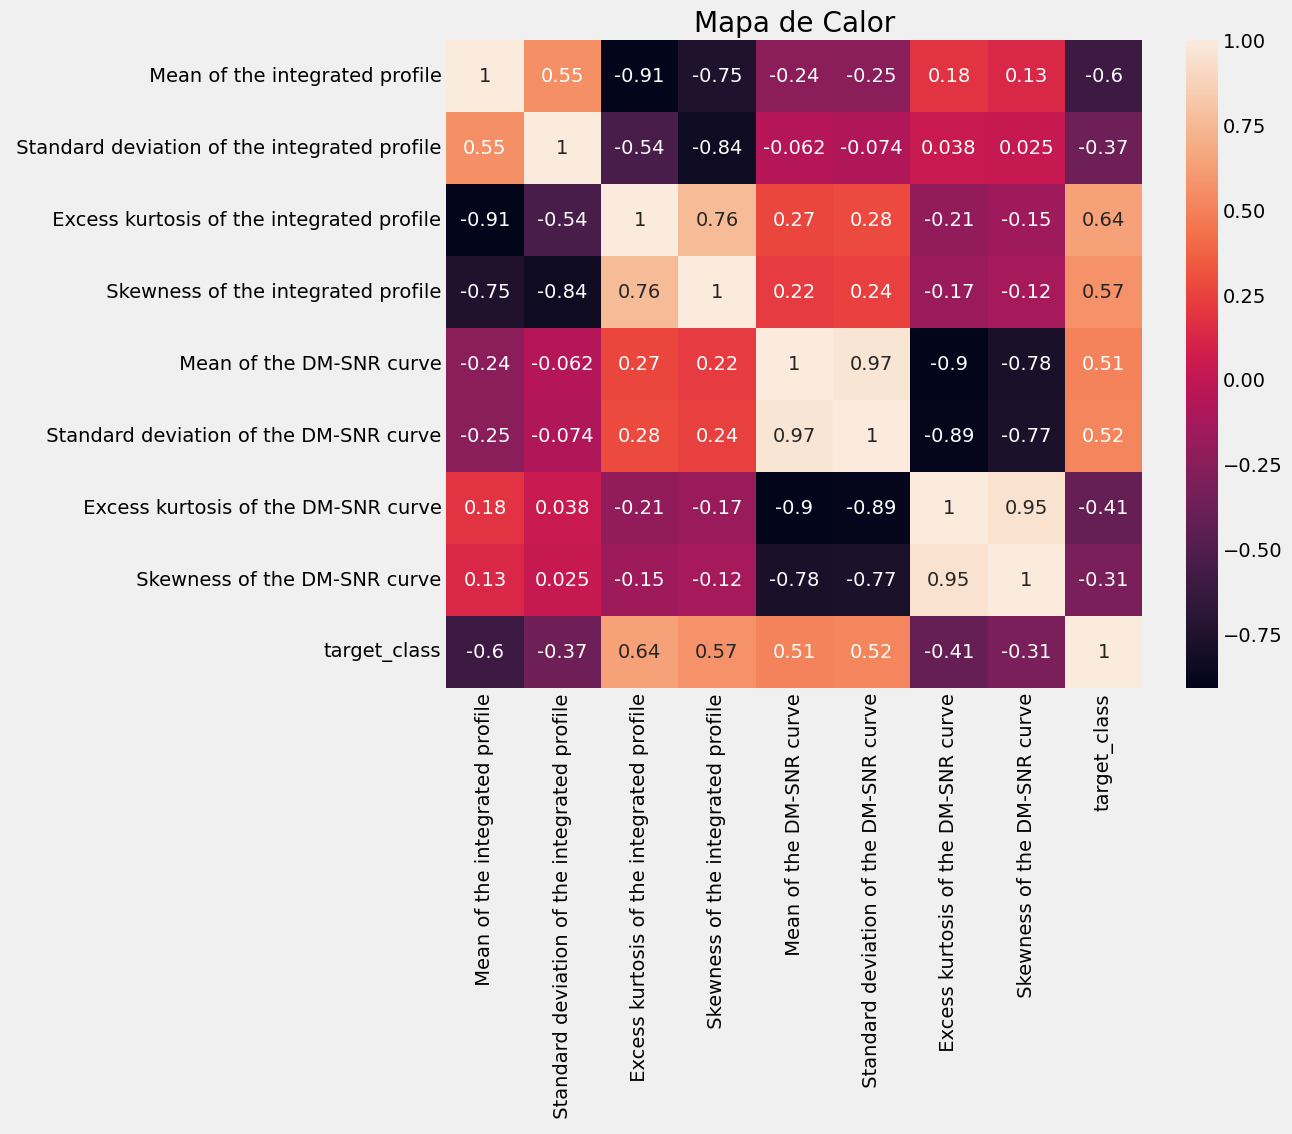

In [72]:
plt.figure(figsize=(10,8))
corr_mat=train_impute_out.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Mapa de Calor')
plt.show()

In [73]:
train_impute_out.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

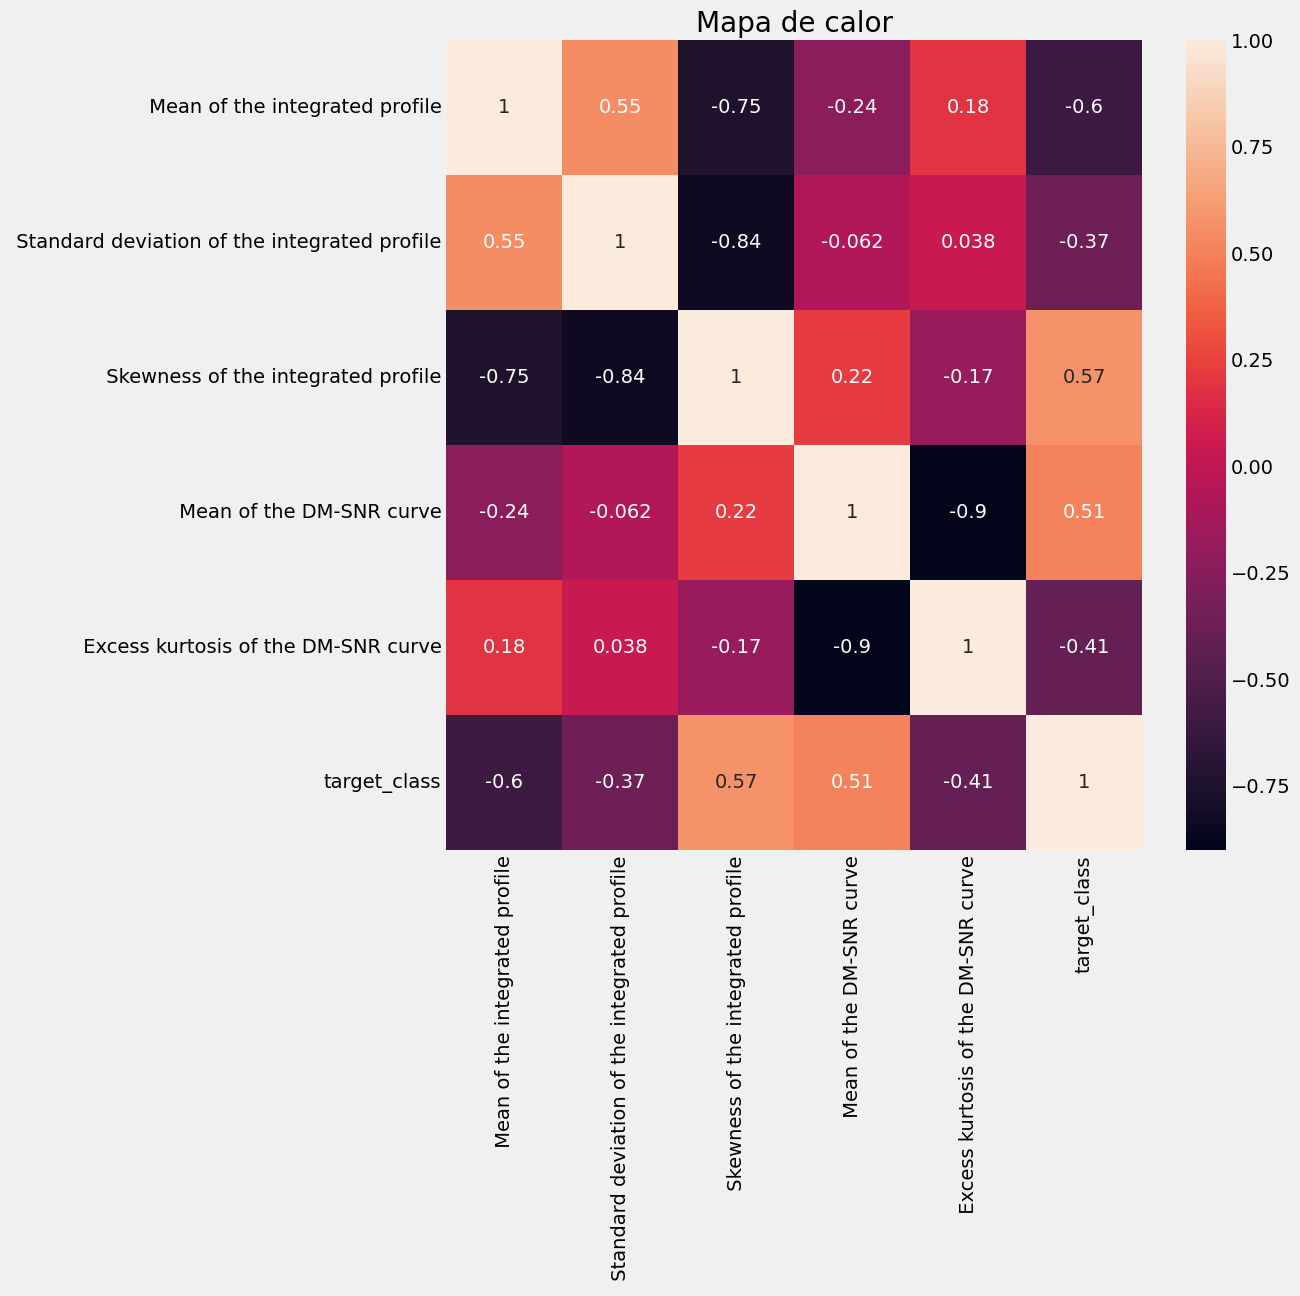

In [75]:
train_final=train_impute_out.drop([' Excess kurtosis of the integrated profile',
                                   ' Standard deviation of the DM-SNR curve',
                                   ' Skewness of the DM-SNR curve'
                                   ],axis=1)
 # Correlation plot after outlier treatment
plt.figure(figsize = (10, 10))
corr_mat = train_final.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)
plt.title('Mapa de calor')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
y=train_final['target_class']
X=train_final.copy().drop(['target_class'],axis=1)

In [81]:
x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.50, random_state=42)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(7516, 5)
(2506, 5)
(2506, 5)
(7516,)
(2506,)
(2506,)


## **Modelos de Machine Learning**

**CatBoostClassifier**

In [82]:
from catboost import CatBoostClassifier
# Crear modelo
model=CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)

# Entrenar con conjuntos de entrenamiento y validación
model.fit(x_train, y_train, 
          eval_set=(x_val, y_val), 
          early_stopping_rounds=50,  # Para detenerse si no hay mejora en 50 iteraciones
          use_best_model=True)

0:	learn: 0.9733901	test: 0.9728651	best: 0.9728651 (0)	total: 165ms	remaining: 2m 44s
100:	learn: 0.9845663	test: 0.9776536	best: 0.9780527 (81)	total: 883ms	remaining: 7.86s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9780526736
bestIteration = 81

Shrink model to first 82 iterations.


In [83]:
from collections import Counter
print("Train class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_val))
print("Test class distribution:", Counter(y_test))

Train class distribution: Counter({0.0: 6837, 1.0: 679})
Validation class distribution: Counter({0.0: 2268, 1.0: 238})
Test class distribution: Counter({0.0: 2270, 1.0: 236})


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9780526735833999
[[2259    9]
 [  46  192]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.96      0.81      0.87       238

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [86]:
# Obtener las probabilidades para la clase positiva (por ejemplo, 1)
y_pred_proba = model.predict_proba(x_test)[:, 1]  
# Calcular FPR (False Positive Rate), TPR (True Positive Rate) y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calcular el AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.98


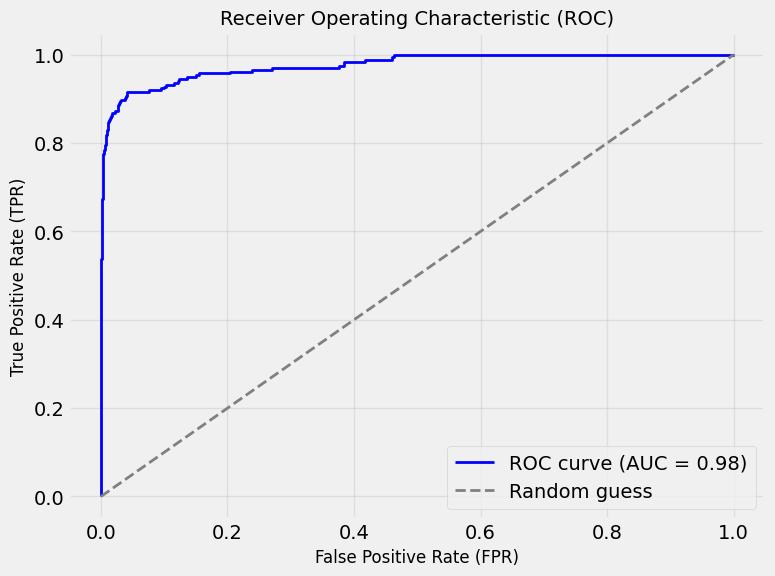

In [87]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()


## **Model Training**

In [95]:
cols=df_test.columns
cols

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [96]:
test_copy=pd.DataFrame(imputer.transform(df_test),columns=df_train.columns.values.tolist())
for col in test_copy.columns[:-1]:
    test_copy[cols] = np.where(test_copy[cols]>upper_range[cols],
                                    upper_range[cols],test_copy[cols])
    test_copy[cols] = np.where(test_copy[cols]<lower_range[cols],
                                    lower_range[cols],test_copy[cols])

[IterativeImputer] Completing matrix with shape (5370, 9)


In [97]:
X_test = test_copy.drop([' Excess kurtosis of the integrated profile', 
                                     ' Skewness of the DM-SNR curve', 
                                     ' Standard deviation of the DM-SNR curve'], axis=1)
X_test = X_test.copy().drop(['target_class'], axis = 1)

In [98]:
y_test_pred = model.predict(X_test)

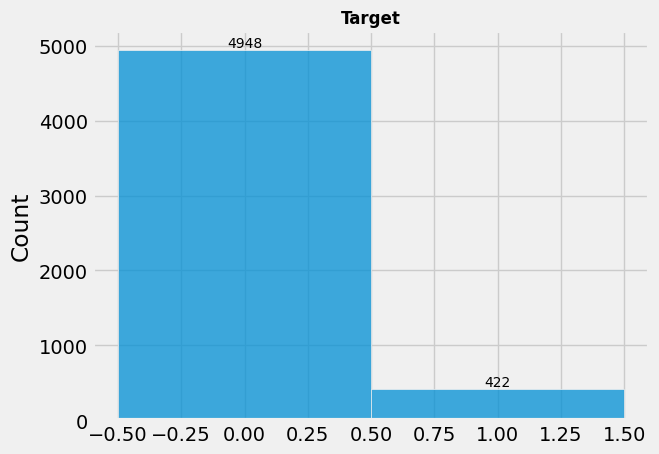

In [100]:
# Crear el histograma
ax = sns.histplot(x=y_test_pred, discrete=True)  # `discrete=True` para categorías discretas (si aplica)

# Agregar etiquetas en las barras
for p in ax.patches:  # Iterar sobre las barras
    ax.annotate(f'{int(p.get_height())}',  # Convertir la altura en un número entero para mostrar el conteo
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Posición del texto
                ha='center', va='bottom', fontsize=10, color='black')  # Estilo del texto

# Agregar título
plt.title('Target', fontsize=12, weight='bold')
plt.show()
